# Data Wrangling

Start by importing packages needed for importing the data and organizing the data.

In [1]:
import pandas as pd
import numpy as np

Import the data and list out all the columns.

In [2]:
df = pd.read_csv("../data/NFWBS_PUF_2016_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


In [4]:
col = list(df.columns)

print(len(col))

for i in col:
    print(i)

217
PUF_ID
sample
fpl
SWB_1
SWB_2
SWB_3
FWBscore
FWB1_1
FWB1_2
FWB1_3
FWB1_4
FWB1_5
FWB1_6
FWB2_1
FWB2_2
FWB2_3
FWB2_4
FSscore
FS1_1
FS1_2
FS1_3
FS1_4
FS1_5
FS1_6
FS1_7
FS2_1
FS2_2
FS2_3
SUBKNOWL1
ACT1_1
ACT1_2
FINGOALS
PROPPLAN_1
PROPPLAN_2
PROPPLAN_3
PROPPLAN_4
MANAGE1_1
MANAGE1_2
MANAGE1_3
MANAGE1_4
SAVEHABIT
FRUGALITY
AUTOMATED_1
AUTOMATED_2
ASK1_1
ASK1_2
SUBNUMERACY2
SUBNUMERACY1
CHANGEABLE
GOALCONF
LMscore
FINKNOWL1
FINKNOWL2
FINKNOWL3
FK1correct
FK2correct
FK3correct
KHscore
KHKNOWL1
KHKNOWL2
KHKNOWL3
KHKNOWL4
KHKNOWL5
KHKNOWL6
KHKNOWL7
KHKNOWL8
KHKNOWL9
KH1correct
KH2correct
KH3correct
KH4correct
KH5correct
KH6correct
KH7correct
KH8correct
KH9correct
ENDSMEET
HOUSING
LIVINGARRANGEMENT
HOUSERANGES
IMPUTATION_FLAG
VALUERANGES
MORTGAGE
SAVINGSRANGES
PRODHAVE_1
PRODHAVE_2
PRODHAVE_3
PRODHAVE_4
PRODHAVE_5
PRODHAVE_6
PRODHAVE_7
PRODHAVE_8
PRODHAVE_9
PRODUSE_1
PRODUSE_2
PRODUSE_3
PRODUSE_4
PRODUSE_5
PRODUSE_6
CONSPROTECT1
CONSPROTECT2
CONSPROTECT3
EARNERS
VOLATILITY
SNAP
MATHARDSHIP_1

# Dealing with missing and other values

The image below has a description of all the missing or other values and how they are listed under each variable.
<div>
    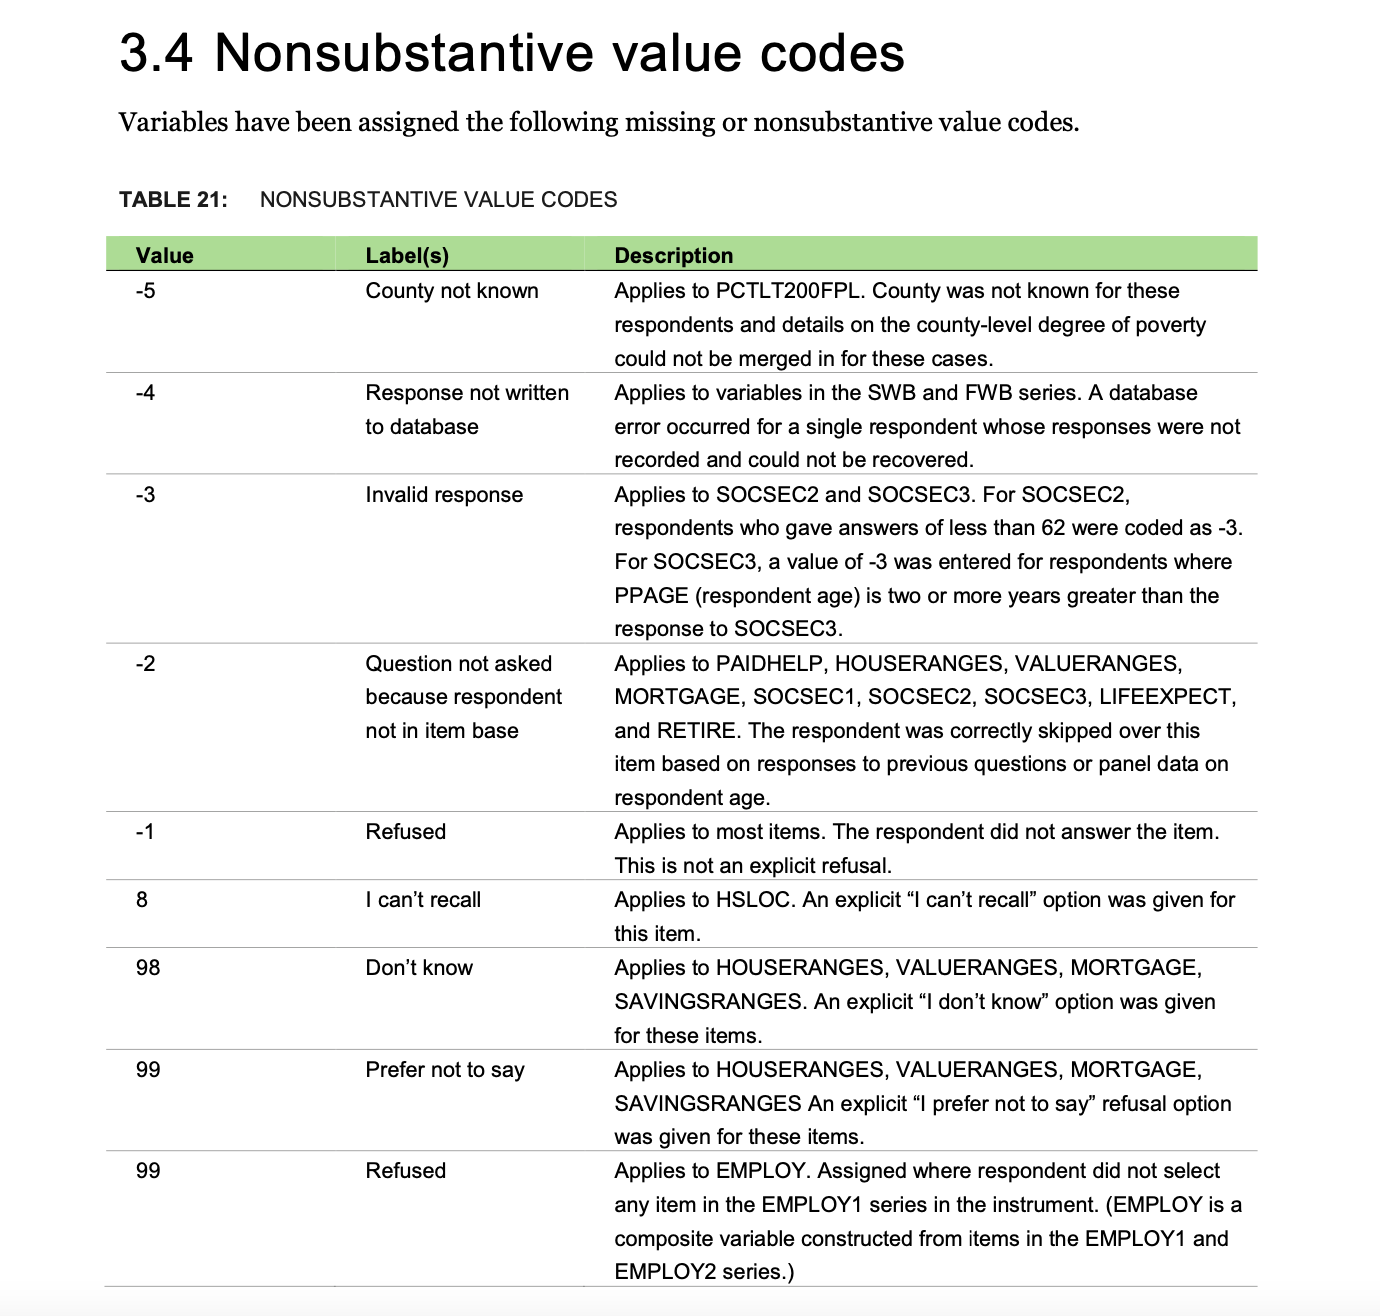
</div>

First, I want to remove all the observations that have multiple questions where they refused to respond without eliminating too much data.

In [5]:
df["sum_nonresp"] = (df==-1).sum(axis=1)

for i in range(1, 11):
    print(f"{i}: {sum(df.sum_nonresp>=i)} ({sum(df.sum_nonresp>=i)/6394:0.2f})")

1: 2302 (0.36)
2: 995 (0.16)
3: 552 (0.09)
4: 358 (0.06)
5: 266 (0.04)
6: 156 (0.02)
7: 108 (0.02)
8: 97 (0.02)
9: 83 (0.01)
10: 78 (0.01)


This shows the counts of observations that chose not to respond to 1-10 questions with the percentage of the entire dataset in perenthesis. This shows that around 36% chose not to respond to 1 question and less than 5% chose not to respond to 5 questions. There is enough data that removing the observations that chose not to respond to 5 or more questions will not have a substantial effect on the number of observations. This will also help when training the model so that there is cleaner data being used. 

In [6]:
df = df[df["sum_nonresp"]<5]
print(df.shape)

(6128, 218)


I also want to make sure to remove the observations that didn't answer the SWB questions as these are our target variables. I will be removing observations where these values are -1 or -4.

In [7]:
df = df[df["SWB_1"]>0]
df = df[df["SWB_2"]>0]
df = df[df["SWB_3"]>0]
print(df.shape)

(6069, 218)


The resulting number of observations is 6,069 which is still plenty of observations to create a model with. 

I will continue to work with the other values after choosing which features to use for the model as some features will be removed. 

# Reducing the number of features

This dataset has 217 variables and will likely lead to overfitting. Reducing the number of variables will lead to a better model. 

Changing the number of correct test question variables to a single score is one way to reduce the number of variables. This will be done for the Knoll and Houts test questions (KH) and financial knowledge questions (FK).

Summing the number of of things that have happened or things someone has is another way to reduce the number of variables. This will be done to the number of benefits, life shocks experienced (SHOCKS), material hardships faced (MATHARDSHIP), and financial experiences taught growing up (FINTAUGHT). 

Averaging the score of similar question variables to get an average score of that category. These variables are on a score of 1 to 5. This will be done to the materialism questions, the planning questions, and the managing finances questions (MANAGE). 

In [8]:
df["KHscore"] = df[["KH1correct", "KH2correct", "KH3correct", "KH4correct", "KH5correct", 
                    "KH6correct", "KH7correct", "KH8correct", "KH9correct"]].sum(axis=1) / 9

In [9]:
df["FKscore"] = df[["FK1correct", "FK2correct", "FK3correct"]].sum(axis=1) / 3

In [10]:
df["Benefits"] = df[["BENEFITS_1", "BENEFITS_2", "BENEFITS_3", 
                     "BENEFITS_4", "BENEFITS_5"]].replace(-1, 0).sum(axis=1)

In [11]:
df["Life shocks"] = df[["SHOCKS_1", "SHOCKS_2", "SHOCKS_3", "SHOCKS_4", "SHOCKS_5", "SHOCKS_6", 
                   "SHOCKS_7", "SHOCKS_8", "SHOCKS_9", "SHOCKS_10", "SHOCKS_11"]].sum(axis=1)

In [12]:
df["Material hardship"] = df[["MATHARDSHIP_1", "MATHARDSHIP_2", 
                        "MATHARDSHIP_3", "MATHARDSHIP_4", 
                        "MATHARDSHIP_5", "MATHARDSHIP_6"]].replace([-1, 1], [0, 0]).replace([2, 3], [1, 1]).sum(axis=1)

In [13]:
df["Finance taught"] = df[["FINSOC2_1", "FINSOC2_2", "FINSOC2_3", "FINSOC2_4", 
                      "FINSOC2_5", "FINSOC2_6", "FINSOC2_7"]].replace(-1, 0).sum(axis=1)

In [14]:
df["Materialism"] = df[["MATERIALISM_1", "MATERIALISM_2", "MATERIALISM_3"]].replace(-1, 0).sum(axis=1) / 3

In [15]:
df["Planning"] = df[["PROPPLAN_1", "PROPPLAN_2", "PROPPLAN_3", "PROPPLAN_4"]].replace(-1, 0).sum(axis=1) / 4

In [16]:
df["Management"] = df[["MANAGE1_1", "MANAGE1_2", "MANAGE1_3", "MANAGE1_4"]].replace(-1, 0).sum(axis=1) / 4

## Selecting Variables
I selected the variables that I think are most applicable to the question.
Variables dropped (Reason):
* sample (Shows oversampling and is not relevant)
* FRUGALITY (The question asked to score frugality could have different implied meanings)
* SUBNUMERACY1/2 (Doesn't seem relevant to happiness)
* ASK1_1/2 (While doing research for monetary decisions is smart, it doesn't seem relevant to happiness)
* IMPUTATION_FLAG (This only affects a small portion of the data)
* CONSPROTECT1/2/3 (These don't seem relevant to happiness)
* SNAP (Only applies to small portion of the data and is likely represented by other variables)
* COLLECT (Doesn't seem relevant to question)
* REJECTED_1/2 (Doesn't seem relevant to question)
* ABSORBSHOCK (Doesn't seem relevant to happiness)
* FRAUD2 (Seems like could affect happiness, but survey question is very open ended)
* COVERCOSTS (Categorical variable that isn't explainable by numerical values)
* BORROW_1/2 (Doesn't seem relevant to happiness)
* MANAGE2, PAIDHELP (Categorical variable that isn't explained well by numerical values)
* HSLOC (Doesn't seem relevant to question)
* ON1/2correct (Doesn't seem relevant to question)
* CONNECT (Couldn't find a good description of this variable)
* DISCOUNT (Represents financial knowledge, but not good representation)
* MEMLOSS (Open ended question that may not have been easily interpreted)
* SELFCONTROL_1/2/3 (Doesn't seem relevant to question)
* OUTLOOK_1/2 (Doesn't seem relevant to question)
* INTERCONNECTIONS_1-10 (Difficult to interpret meaning from the model)
* SOCSEC1/2/3 (Only applicable to a portion of the data and doesn't seem like 
* KIDS_NoChildren (Difficult to interpret meaning from as applies to happiness)
* EMPLOY (The other employ variables better explain this variable)
* RETIRE (Only applies to about 30% of respondents)
* MILITARY (Very open ended question)
* generation (redundant information)
* PPREG4 (redundant information)
* PPT vars (redundant information)
* PEM (This could be seen as another way of asking about the person's future)
* CHANGEABLE (This could be seen as another way of asking about the person's future)
* LIVINGARRANGEMENT (This variable isn't described well by numbers)


This results in 65 remaining variables and 3 of them are the varaibles that I am trying to predict. 

In [17]:
variables = df[["SWB_1", "SWB_2", "SWB_3", 
                "FWBscore", "FSscore", "FKscore", "KHscore", "SUBKNOWL1", 
                "ACT1_1", "ACT1_2", "FINGOALS", "GOALCONF", 
                "Planning", # All represent planning skills
                "Management", "ENDSMEET", # All represent ability to manage expenses
                "SAVEHABIT", "AUTOMATED_1", "AUTOMATED_2", # These are similar showing savings and putting money to future use. 
                "HOUSING", "HOUSERANGES", "VALUERANGES", "MORTGAGE", "HOUSESAT", # HOUSESAT related to housing variables
                "SAVINGSRANGES", 
                "PRODHAVE_9", # PRODHAVE vars ask if the person uses different investment vehicles
                "PRODUSE_6", # PRODUSE vars ask if the person uses non-backed or high interest ways to get quick money
                "EARNERS", "VOLATILITY", 
                "Material hardship", 
                "Benefits",  
                "Life shocks", 
                "PAREDUC", "Finance taught", 
                "Materialism", 
                "HEALTH", "DISTRESS", "LIFEEXPECT", 
                "SCFHORIZON",
                "HHEDUC", "PPEDUC", 
                "KIDS_1", "KIDS_2", "KIDS_3", "KIDS_4", # 1: 0-7, 2: 7-12, 3: 13-17, 4: 18+
                "EMPLOY1_1", "EMPLOY1_2", "EMPLOY1_3", "EMPLOY1_4", 
                "EMPLOY1_5", "EMPLOY1_6", "EMPLOY1_7", "EMPLOY1_8", "EMPLOY1_9",
                "Military_Status", 
                "agecat", "PPETHM", "PPGENDER", "PPINCIMP", "PPHHSIZE", "PPMARIT", "PPMSACAT", "fpl", # fpl = relation to poverty status 
                "PPREG9", "PCTLT200FPL"]]

variables.describe()

,SWB_1,SWB_2,SWB_3,FWBscore,FSscore,FKscore,KHscore,SUBKNOWL1,ACT1_1,ACT1_2,...,agecat,PPETHM,PPGENDER,PPINCIMP,PPHHSIZE,PPMARIT,PPMSACAT,fpl,PPREG9,PCTLT200FPL
count,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,...,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000
mean,5.384577,5.419509,5.500741,56.107431,50.786291,0.844016,0.708610,4.690888,4.227056,3.612292,...,4.444060,1.613610,1.469600,5.558082,2.528423,2.042017,0.866041,2.668973,5.135442,-0.079255
std,1.429190,1.421764,1.475980,14.047182,12.475301,0.242632,0.201075,1.258204,0.881128,0.909802,...,2.115574,1.071821,0.499116,2.655288,1.225306,1.397113,0.340637,0.648761,2.530326,1.318626
min,1.000000,1.000000,1.000000,14.000000,5.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-5.000000
25%,5.000000,5.000000,5.000000,48.000000,42.000000,0.666667,0.555556,4.000000,4.000000,3.000000,...,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,0.000000
50%,6.000000,6.000000,6.000000,56.000000,50.000000,1.000000,0.777778,5.000000,4.000000,4.000000,...,4.000000,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,3.000000,5.000000,0.000000
75%,6.000000,7.000000,7.000000,65.000000,57.000000,1.000000,0.888889,5.000000,5.000000,4.000000,...,6.000000,2.000000,2.000000,8.000000,3.000000,3.000000,1.000000,3.000000,7.000000,0.000000
max,7.000000,7.000000,7.000000,95.000000,85.000000,1.000000,1.000000,7.000000,5.000000,5.000000,...,8.000000,4.000000,2.000000,9.000000,5.000000,5.000000,1.000000,3.000000,9.000000,1.000000


Now that the number of variables has been reduced down to 65, I will continue to work with the missing and other answers. 

<div>
    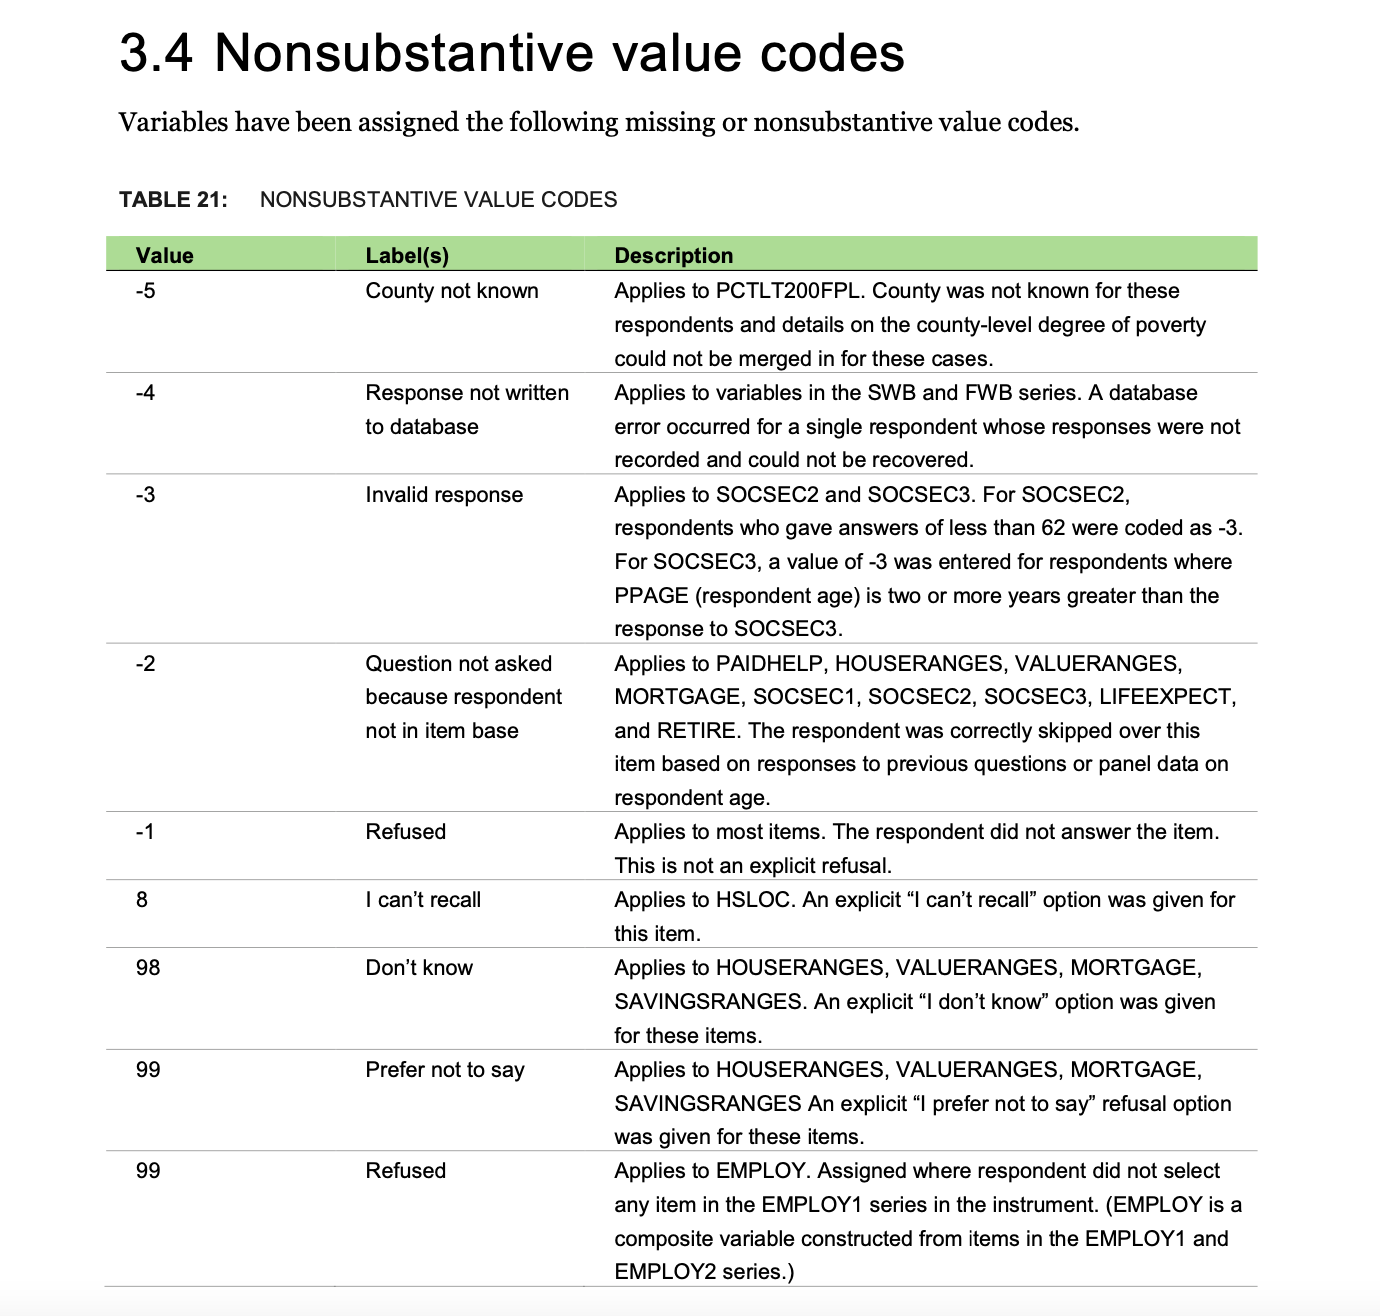
</div>

I will start by looking at PCTLT200FPL which is a binary variable for 40% or more of county residents are above 200% of the poverty level. This variable could potentially show how individuals compare their financial standing to others around them. 

In [18]:
print(variables["PCTLT200FPL"].value_counts())

 0    4336
 1    1364
-5     369
Name: PCTLT200FPL, dtype: int64


Because this is a variable that may have valuable information, I want to keep it in the model. But I may just have to leave the -5 observations in, because that is around 5% of observations that would be dropped if I were to take it out. 

Now I need to work with values that are -2. Because most of the variables left in the model that have -2 are related to HOUSING, I will visualize HOUSING first.

In [19]:
print(variables["HOUSING"].value_counts())

 1    3986
 2    1554
 3     515
-1      14
Name: HOUSING, dtype: int64


About 1/3 of the observations are either renting or they don't own their home so this makes HOUSERANGES, VALUERANGES,  and MORTGAGE irrelevant to them. It may be best to change the -2 values to NaN values for the model for these variables. 

# Change the markdown codes so that it makes more sense as to why leaving out certain variables and leaving in the -1 values

The LIFEEXPECT variable asks how likely the respondent thinks they will live past the age of 75. Those that are already older than 75 have the value of -2 and it may be best to change this value to 100 because they have already lived past the age of 75.

In [20]:
variables["LIFEEXPECT"] = variables["LIFEEXPECT"].replace(-2, 100)

print(variables["LIFEEXPECT"].value_counts())

100    2021
50      789
90      526
80      493
75      388
       ... 
81        1
91        1
41        1
28        1
24        1
Name: LIFEEXPECT, Length: 78, dtype: int64


/var/folders/q_/__ygd9nj74j0b_2cqlrrswsw0000gn/T/ipykernel_20915/3270800345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables["LIFEEXPECT"] = variables["LIFEEXPECT"].replace(-2, 100)


After removing the observations that had more than 5 refuse to respond answers and removing other variables there should be a lot less observations that have -1 responses. By looking at the counts of refused responses in each variable, I can determine what to do with these refused responses.

In [21]:
for i in variables.columns:
    count_refused = variables[i].value_counts()[variables[i].value_counts().index==-1]
    
    if count_refused.empty:
        continue
        
    print(f"{i}: {count_refused.iloc[0]}")

SUBKNOWL1: 39
ACT1_1: 15
ACT1_2: 9
FINGOALS: 60
GOALCONF: 8
ENDSMEET: 14
SAVEHABIT: 4
AUTOMATED_1: 61
AUTOMATED_2: 68
HOUSING: 14
HOUSERANGES: 41
VALUERANGES: 5
MORTGAGE: 43
HOUSESAT: 14
SAVINGSRANGES: 12
EARNERS: 37
VOLATILITY: 28
PAREDUC: 26
HEALTH: 20
DISTRESS: 7
LIFEEXPECT: 49
SCFHORIZON: 33
HHEDUC: 20
KIDS_1: 1
KIDS_2: 2
KIDS_3: 1
KIDS_4: 7
Military_Status: 33


Going back to HOUSERANGES, VALUERANGES, and MORTGAGE, I need to view the counts of 98(don't know) and 99(prefer not to respond) to determine how to handle these values.

In [22]:
for i in ["HOUSERANGES", "VALUERANGES",  "MORTGAGE"]:
    print(variables[i].value_counts().sort_index())

-1       41
 1     1060
 2      442
 3      846
 4      786
 5     1031
 6      523
 7      544
 98     236
 99     560
Name: HOUSERANGES, dtype: int64
-2     2083
-1        5
 1      991
 2     1006
 3      954
 4      786
 98     103
 99     141
Name: VALUERANGES, dtype: int64
-2     2083
-1       43
 1     1453
 2     1316
 3      607
 98     106
 99     461
Name: MORTGAGE, dtype: int64


There is also a significant number that either didn't know or preferred not to respond. However, I think that these variables could provide valueable insight to the model so it is best to leave these variables in the model. It may be best to change these values to NaN values as well. 

In the [codebook](https://files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf) AUTOMATED_1 and AUTOMATED_2 have a value of 7 for if the person doesn't have that type of account. I will just add these people to no answer as they also are not consistently contributing to savings accounts. 

In [23]:
variables["AUTOMATED_1"] = variables["AUTOMATED_1"].replace(7, 0)
print(variables["AUTOMATED_1"].value_counts())

variables["AUTOMATED_2"] = variables["AUTOMATED_2"].replace(7, 0)
print(variables["AUTOMATED_2"].value_counts())

 0    3517
 1    2491
-1      61
Name: AUTOMATED_1, dtype: int64
 0    3564
 1    2437
-1      68
Name: AUTOMATED_2, dtype: int64


/var/folders/q_/__ygd9nj74j0b_2cqlrrswsw0000gn/T/ipykernel_20915/2781148092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables["AUTOMATED_1"] = variables["AUTOMATED_1"].replace(7, 0)
/var/folders/q_/__ygd9nj74j0b_2cqlrrswsw0000gn/T/ipykernel_20915/2781148092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables["AUTOMATED_2"] = variables["AUTOMATED_2"].replace(7, 0)


## Add in outside data

I want to add in a variable that shows if an individual makes at or more than the median income for their region. To do this I will import 2016 data for median income per state to use to calculate this. But because this survey only has the individual's region that they live in, I will take the average median income to compare against the individual's income. 

The median income per state data comes from Federal Reserve Economic Data [(FRED)](https://fred.stlouisfed.org). The data for which region each state is from can be found [here](https://www2.census.gov/geo/pdfs/reference/GARM/Ch6GARM.pdf).

In [24]:
med_income = pd.read_csv("../data/2016_data_Annual.txt", sep="\t")

med_income.head()

,DATE,MEHOINUSAKA672N,MEHOINUSALA672N,MEHOINUSARA672N,MEHOINUSAZA672N,MEHOINUSCAA672N,MEHOINUSCOA672N,MEHOINUSCTA672N,MEHOINUSDEA672N,MEHOINUSFLA672N,...,MEHOINUSSDA672N,MEHOINUSTNA672N,MEHOINUSTXA672N,MEHOINUSUTA672N,MEHOINUSVAA672N,MEHOINUSVTA672N,MEHOINUSWAA672N,MEHOINUSWIA672N,MEHOINUSWVA672N,MEHOINUSWYA672N
0,1984-01-01,76992,41190,37297,50981,60171,61394,71269,61437,47079,...,46184,39933,54786,54865,63117,53725,59529,49358,40078,56671
1,1985-01-01,80017,42176,40147,54930,62071,64834,71524,52866,49100,...,41736,40899,54622,58061,65402,59814,55213,53478,36770,50798
2,1986-01-01,70895,43257,42348,57655,65591,61480,73981,57940,51661,...,44989,41276,54630,59421,67185,55618,60777,59758,37225,53266
3,1987-01-01,72640,43134,41152,58467,65893,57871,71829,63921,53528,...,46231,46293,54035,57987,65565,55552,59713,57637,37611,60306
4,1988-01-01,69833,42082,42554,55767,63893,55300,76394,64353,53596,...,47031,43997,52661,55509,68873,61152,68196,62391,40827,55733


In [25]:
mi_2016 = med_income[pd.to_datetime(med_income.DATE).dt.year==2016]
mi_2016 = pd.melt(mi_2016, id_vars=["DATE"], value_vars=mi_2016.iloc[1:], var_name="StateID", value_name="med_income")
mi_2016.head()

,DATE,StateID,med_income
0,2016-01-01,MEHOINUSAKA672N,81680
1,2016-01-01,MEHOINUSALA672N,50936
2,2016-01-01,MEHOINUSARA672N,49518
3,2016-01-01,MEHOINUSAZA672N,61592
4,2016-01-01,MEHOINUSCAA672N,71879


In [26]:
state_dict = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO",
              "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
              "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",  "Kentucky": "KY", "Louisiana": "LA",
              "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", 
              "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
              "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC",
              "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA",
              "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX",
              "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", 
              "Wisconsin": "WI", "Wyoming": "WY"}

states = []

for i in mi_2016.StateID:
    states.append(list(state_dict.keys())[list(state_dict.values()).index(i[8:10])])
    
mi_2016 = pd.concat([mi_2016, pd.Series(states)], axis=1)
mi_2016 = mi_2016.rename(columns={0: "State"})
mi_2016.head()

,DATE,StateID,med_income,State
0,2016-01-01,MEHOINUSAKA672N,81680,Alaska
1,2016-01-01,MEHOINUSALA672N,50936,Alabama
2,2016-01-01,MEHOINUSARA672N,49518,Arkansas
3,2016-01-01,MEHOINUSAZA672N,61592,Arizona
4,2016-01-01,MEHOINUSCAA672N,71879,California


In [27]:
region_dict = {"New England": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"], 
               "Mid-Atlantic": ["New Jersey", "New York", "Pennsylvania"],
               "East-North Central": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin"],
               "West-North Central": ["Iowa", "Kansas", "Minnesota", "Missouri", 
                                      "Nebraska", "North Dakota", "South Dakota"],
               "South Atlantic": ["Delaware", "Florida", "Georgia", "Maryland", 
                                  "North Carolina", "South Carolina", "Virginia", "West Virginia"],
               "East-South Central": ["Alabama", "Kentucky", "Mississippi", "Tennessee"],
               "West-South Central": ["Arkansas", "Louisiana", "Oklahoma", "Texas"],
               "Mountain": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming"],
               "Pacific": ["Alaska", "California", "Hawaii", "Oregon", "Washington"]}

r = []
for i in mi_2016.State:
    for j in region_dict:
        if i in region_dict[j]:
            r.append(j)
    
mi_2016 = pd.concat([mi_2016, pd.Series(r)], axis=1)
mi_2016 = mi_2016.rename(columns={0: "Region"})
mi_2016.head()

,DATE,StateID,med_income,State,Region
0,2016-01-01,MEHOINUSAKA672N,81680,Alaska,Pacific
1,2016-01-01,MEHOINUSALA672N,50936,Alabama,East-South Central
2,2016-01-01,MEHOINUSARA672N,49518,Arkansas,West-South Central
3,2016-01-01,MEHOINUSAZA672N,61592,Arizona,Mountain
4,2016-01-01,MEHOINUSCAA672N,71879,California,Pacific


In [28]:
regions = mi_2016.groupby("Region").mean("med_income").reset_index()
regions

,Region,med_income
0,East-North Central,62211.600000
1,East-South Central,49897.250000
2,Mid-Atlantic,68633.333333
3,Mountain,63438.500000
4,New England,71492.166667
5,Pacific,74198.800000
6,South Atlantic,61404.750000
7,West-North Central,64434.285714
8,West-South Central,53175.750000


In [29]:
variables = variables.replace({"PPREG9":{1: "New England",
                                         2: "Mid-Atlantic",
                                         3: "East-North Central",
                                         4: "West-North Central",
                                         5: "South Atlantic",
                                         6: "East-South Central",
                                         7: "West-South Central",
                                         8: "Mountain",
                                         9: "Pacific"},
                               "PPINCIMP":{1: 19999,
                                           2: 29999,
                                           3: 39999,
                                           4: 49999,
                                           5: 59999,
                                           6: 74999,
                                           7: 99999,
                                           8: 149999,
                                           9: 200000}})

variables = variables.rename(columns={"PPREG9": "Region", "PPINCIMP": "Income"})

In [30]:
variables = pd.merge(variables, regions, on="Region", how="left")
variables[["Region", "med_income", "Income"]].head(10)

,Region,med_income,Income
0,Mountain,63438.500000,99999
1,East-North Central,62211.600000,74999
2,Pacific,74198.800000,74999
3,West-North Central,64434.285714,99999
4,East-North Central,62211.600000,99999
5,West-North Central,64434.285714,99999
6,West-North Central,64434.285714,49999
7,Mid-Atlantic,68633.333333,149999
8,Mountain,63438.500000,74999
9,Mountain,63438.500000,149999


In [31]:
variables["Above med income"] = variables.med_income < variables.Income

# Describe important variables and rename all the variables to make more sense. 

In [32]:
important_vars = ["SWB_1", "SWB_2", "SWB_3", 
                  "FWBscore", "FSscore", "KHscore", 
                  "Material hardship", "Life shocks", "Benefits", 
                  "HOUSING", "HOUSERANGES", "VALUERANGES",
                  "Income", "Above med income"]

variables = variables.replace({"HOUSING":{
                                          -1: "Refused",
                                          1: "I own my home",
                                          2: "I rent",
                                          3: "I do not currently own or rent"
                                          },
                               "HOUSERANGES":{
                                          -1: "Refused",
                                          1: "Less than $300",
                                          2: "$300-499",
                                          3: "$500-749",
                                          4: "$750-999",
                                          5: "$1,000-1,499",
                                          6: "$1,500-1,999",
                                          7: "$2,000 or more",
                                          98: "I dont know",
                                          99: "Prefer not to say"
                                          },
                              "VALUERANGES":{
                                          -2: "Doesn't apply",
                                          -1: "Refused",
                                          1: "Less than $150,000",
                                          2: "$150,000-249,999",
                                          3: "$250,000-399,999",
                                          4: "$400,000 or more",
                                          98: "I dont know",
                                          99: "Prefer not to say"
                                          },
                               "PAREDUC":{
                                          -1: "Refused",
                                          1: "Less than high school",
                                          2: "High school degree/GED",
                                          3: "Some college/Associate",
                                          4: "Bachelors degree",
                                          5: "Graduate/professional degree"
                                          },
                               "HHEDUC":{
                                          -1: "Refused",
                                          1: "Less than high school",
                                          2: "High school degree/GED",
                                          3: "Some college/Associate",
                                          4: "Bachelors degree",
                                          5: "Graduate/professional degree"
                                          },
                               "PPEDUC":{
                                          1: "Less than high school",
                                          2: "High school degree/GED",
                                          3: "Some college/Associate",
                                          4: "Bachelors degree",
                                          5: "Graduate/professional degree"
                                          },
                               "Military_Status":{
                                          -1: "Refused",
                                          1: "Active military (active, reserve, natl guard)",
                                          2: "Veteran (veteran or retired)",
                                          3: "Spouse/dependent Active",
                                          4: "Spouse/dependent Veteran",
                                          5: "Neither Active nor Veteran"
                                          },
                               "agecat":{
                                          1: "18-24",
                                          2: "25-34",
                                          3: "35-44",
                                          4: "45-54",
                                          5: "55-61",
                                          6: "62-69",
                                          7: "70-74",
                                          8: "75+"
                                          },
                               "PPETHM":{
                                          1: "White - Non-Hispanic",
                                          2: "Black - Non-Hispanic",
                                          3: "Other - Non-Hispanic",
                                          4: "Hispanic"
                                          },
                               "PPGENDER":{
                                          1: 0,
                                          2: 1
                                          },
                               "PPMARIT":{
                                          1: "Married",
                                          2: "Widowed",
                                          3: "Divorced/Separated",
                                          4: "Never married",
                                          5: "Living with partner"
                                          },
                               "fpl":{
                                          1: "<100% FPL",
                                          2: "100%-199% FPL",
                                          3: "200%+ FPL"
                                          },
                               "Above med income":{
                                          True: 1,
                                          False: 0
                                          }})

variables[important_vars].describe()

,SWB_1,SWB_2,SWB_3,FWBscore,FSscore,KHscore,Material hardship,Life shocks,Benefits,Income,Above med income
count,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000
mean,5.384577,5.419509,5.500741,56.107431,50.786291,0.708610,0.788927,0.792717,2.206294,93486.533531,0.582139
std,1.429190,1.421764,1.475980,14.047182,12.475301,0.201075,1.546714,1.023556,1.603171,59728.281469,0.493248
min,1.000000,1.000000,1.000000,14.000000,5.000000,0.000000,0.000000,0.000000,0.000000,19999.000000,0.000000
25%,5.000000,5.000000,5.000000,48.000000,42.000000,0.555556,0.000000,0.000000,1.000000,39999.000000,0.000000
50%,6.000000,6.000000,6.000000,56.000000,50.000000,0.777778,0.000000,1.000000,2.000000,74999.000000,1.000000
75%,6.000000,7.000000,7.000000,65.000000,57.000000,0.888889,1.000000,1.000000,3.000000,149999.000000,1.000000
max,7.000000,7.000000,7.000000,95.000000,85.000000,1.000000,6.000000,11.000000,5.000000,200000.000000,1.000000


In [33]:
variables = variables.rename(columns={"SWB_1": "Happiness", "SWB_2": "Future", "SWB_3": "Hardwork", 
                                      "SUBKNOWL1": "Financial knowledge", 
                                      "ACT1_1": "Reliable", "ACT1_2": "Self-commitment", 
                                      "FINGOALS": "Financial Goals", "GOALCONF": "Goal confidence",
                                      "SAVEHABIT": "Savings habit", "AUTOMATED_1": "Retirement savings", 
                                      "AUTOMATED_2": "Non-retirement savings",
                                      "ENDSMEET": "Expenses difficulty",
                                      "HOUSERANGES": "Monthly payment", "VALUERANGES": "Home value", 
                                      "HOUSING": "Housing", "MORTGAGE": "Remaining mortgage", 
                                      "HOUSESAT": "Housing satisfaction",
                                      "SAVINGSRANGES": "Savings amount", 
                                      "PRODHAVE_9": "Smart investing", 
                                      "PRODUSE_6": "Poor investing", 
                                      "EARNERS": "Number of earners", "VOLATILITY": "Income volatility",
                                      "PAREDUC": "Parents education",
                                      "HEALTH": "Health", "DISTRESS": "Stress", 
                                      "LIFEEXPECT": "Probability of 75 years", 
                                      "SCFHORIZON": "Financial planning horizon",
                                      "HHEDUC": "Household education", "PPEDUC": "Education",
                                      "KIDS_1": "Kids 0-7", "KIDS_2": "Kids 7-12", 
                                      "KIDS_3": "Kids 13-17", "KIDS_4": "Kids 18+",
                                      "EMPLOY1_1": "Self-employed", "EMPLOY1_2": "Full-time", 
                                      "EMPLOY1_3": "Part-time", "EMPLOY1_4": "Homemaker",
                                      "EMPLOY1_5": "Student", "EMPLOY1_6": "Unable to work", 
                                      "EMPLOY1_7": "Unemployed", "EMPLOY1_8": "Retired", 
                                      "EMPLOY1_9": "Other employment",
                                      "Military_Status": "Military status",
                                      "agecat": "Age", "PPETHM": "Race", "PPGENDER": "Female", 
                                      "PPHHSIZE": "House size", 
                                      "PPMARIT": "Marital status", "PPMSACAT": "Metro area", 
                                      "fpl": "Percent of poverty line",
                                      "PCTLT200FPL": "Poor county"})

variables = variables.drop(["med_income", "Income"], axis=1)
variables.columns

Index(['Happiness', 'Future', 'Hardwork', 'FWBscore', 'FSscore', 'FKscore',
       'KHscore', 'Financial knowledge', 'Reliable', 'Self-commitment',
       'Financial Goals', 'Goal confidence', 'Planning', 'Management',
       'Expenses difficulty', 'Savings habit', 'Retirement savings',
       'Non-retirement savings', 'Housing', 'Monthly payment', 'Home value',
       'Remaining mortgage', 'Housing satisfaction', 'Savings amount',
       'Smart investing', 'Poor investing', 'Number of earners',
       'Income volatility', 'Material hardship', 'Benefits', 'Life shocks',
       'Parents education', 'Finance taught', 'Materialism', 'Health',
       'Stress', 'Probability of 75 years', 'Financial planning horizon',
       'Household education', 'Education', 'Kids 0-7', 'Kids 7-12',
       'Kids 13-17', 'Kids 18+', 'Self-employed', 'Full-time', 'Part-time',
       'Homemaker', 'Student', 'Unable to work', 'Unemployed', 'Retired',
       'Other employment', 'Military status', 'Age', 'Race',

Export the resulting dataframe to a csv file. 



In [34]:
variables.to_csv("../data/clean_data.csv")